# Exploratory Data Analysis of an Exoplanet dataset


## Introduction

This Notebook makes up the second part of the project, which consists of exploring the data extracted with the API request and finding valuable insights. To do so, I will code an Exploratory Data Analysis (EDA) based on the dataset with information about Exoplanets (.csv).

The Notebook's structure is:
  
1.   **EDA**: a fundamental part for any data analysis, which can be broadly summarized in the following steps:

  > - Data Collection: involves gathering the data from different sources. In my case, I used the NASA's open API to create the dataset.
  > - Data Cleaning: consists of cleansing the data from possible errors, missing values, outliers, etc. to prepare it for the visualization.
  > - Data Visualization: creates the visual part of the problem through different types of graphs that adjust to the context (one or multiple variables, numerical or categorical variables, etc.)
  > - Data Analysis: once the visuals are done, analyzing the data includes using statistical techniques, like the mean, medians or standard desviations.
  > - Interpretation: the conclusions obtained from all the previous steps (step 2 of this Notebook's structure).

  
2.   **Insights**: based on the previous analysis
3.   **Conclusion**: my view on the entire project and other personal comments.






In [85]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/Documentos/RawData&EDA/"
import os
os.chdir(PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## EDA

### Dataset information

Once everything is set, the analysis begins

In [87]:
# Loading the dataset
df = pd.read_csv("exoplanet_data.csv")
pd.set_option("display.max_columns", None)

In [88]:
df.head()
# IMPORTANT: the explanation of each attribute is on the "AttributesExplained.txt" file

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011,197.046,0.4,NaN,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,NaN,NaN,NaN,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,NaN,NaN,NaN,4.50,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,NaN,NaN,NaN,4.50,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000,3000.000,NaN,0.06,41.2441


In [89]:
# Basic info

print(f'Data dimensions: {df.shape[0]} rows, {df.shape[1]} columns')
print('---------------------------------')

print(f'Types of attributes: \n{df.dtypes.value_counts()}')
print('---------------------------------')

print(f'Attribute per type: \n{df.dtypes}')


Data dimensions: 35181 rows, 15 columns
---------------------------------
Types of attributes: 
float64    6
int64      5
object     4
dtype: int64
---------------------------------
Attribute per type: 
pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
sy_mnum              int64
cb_flag              int64
discoverymethod     object
disc_year            int64
disc_facility       object
pl_orbper          float64
pl_rade            float64
pl_masse           float64
pl_dens            float64
st_age             float64
sy_dist            float64
dtype: object


In [90]:
# Statistical information for numerical variables

df.describe()

,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
count,35181.000000,35181.000000,35181.0,35181.000000,35181.000000,3.211000e+04,24211.000000,3607.000000,1881.000000,7132.000000,34359.000000
mean,1.081976,1.878883,0.0,0.002246,2015.301299,1.359459e+04,5.303669,723.725349,2.794426,4.571783,739.503195
std,0.303644,1.193584,0.0,0.047334,3.781024,2.244698e+06,70.262559,1505.228689,5.739811,3.552458,778.399024
min,1.000000,1.000000,0.0,0.000000,1992.000000,9.070629e-02,0.270000,0.020000,0.010000,0.000000,1.301190
25%,1.000000,1.000000,0.0,0.000000,2014.000000,4.460782e+00,1.550000,15.400000,0.511000,2.100000,304.645000
50%,1.000000,1.000000,0.0,0.000000,2016.000000,1.052629e+01,2.280000,186.876000,1.130000,3.985000,613.129000
75%,1.000000,2.000000,0.0,0.000000,2016.000000,2.747856e+01,3.230000,624.534390,3.200000,5.890000,961.405000
max,4.000000,8.000000,0.0,1.000000,2023.000000,4.020000e+08,4282.980000,25426.400000,140.000000,16.800000,8800.000000


sy_mnum, which refers to the number of moons the exoplanet has, is always constant. In other words, there is no change in the data provided. It won't add any insight to the problem and therefore should be deleted.

In [91]:
# Null values (count and %)

null_values = pd.DataFrame()
null_values['#'] = df.isnull().sum()
null_values['%'] = null_values['#'] / len(df)
null_values

,#,%
pl_name,0,0.000000
hostname,0,0.000000
sy_snum,0,0.000000
sy_pnum,0,0.000000
sy_mnum,0,0.000000
cb_flag,0,0.000000
discoverymethod,0,0.000000
disc_year,0,0.000000
disc_facility,0,0.000000
pl_orbper,3071,0.087291


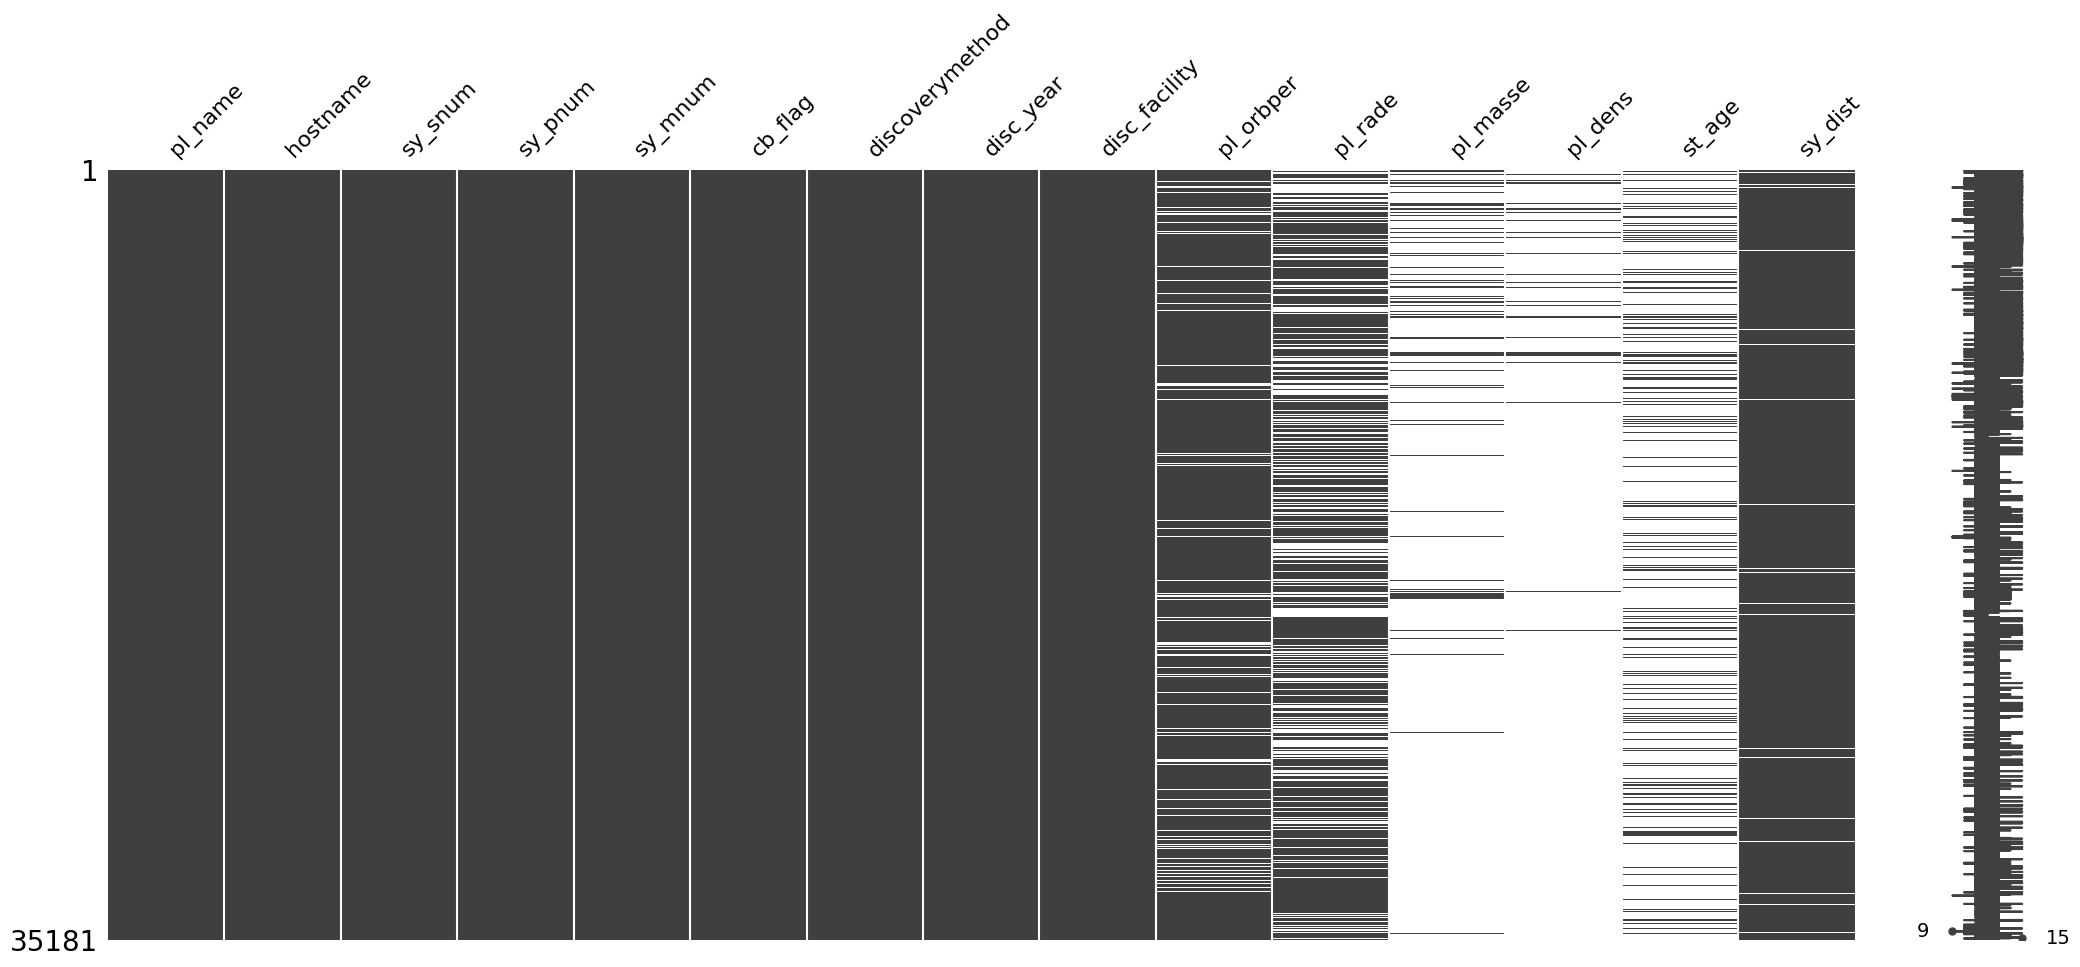

In [92]:
# Null values visualization
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

The mass and density of the exoplanet, as well as the age of the host star are mostly Null. They can't add valuable information, so it might be better to delete them.

At around 30% of null values it also stands the radius of the exoplanet, pl_rade, as well as the time the planet takes to make a complete orbit around the host star, pl_orber, which reaches almost 10%. Since the dataset is small, I'm going to substitute the missing values with the mean of the rest of the data in each attribute as an imputation method.

In [93]:
# Replace Null values with the mean
mean_value = df['pl_rade'].mean()
df['pl_rade'].fillna(mean_value, inplace=True)


mean_value = df['pl_orbper'].mean()
df['pl_orbper'].fillna(mean_value, inplace=True)

In [94]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011000,197.046,0.4,NaN,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,5.303669,NaN,NaN,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,5.303669,NaN,NaN,4.50,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,5.303669,NaN,NaN,4.50,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000000,3000.000,NaN,0.06,41.2441


Now I'm going to take a closer look to categorical variables, which are discoverymethod and disc_facility. Let's take a look to the unique values of each of these and determine which are most frequent (I'm not going to consider either planet name or host name because they are just names that identify the objects, but don't give any information worth analysing).

In [95]:
# Categorical variable discoverymethod
df['discoverymethod'].value_counts()

Transit                          31766
Radial Velocity                   2473
Microlensing                       618
Transit Timing Variations          132
Imaging                            131
Eclipse Timing Variations           23
Orbital Brightness Modulation       20
Pulsar Timing                       12
Astrometry                           3
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: discoverymethod, dtype: int64

In [96]:
# Categorical variable disc_facility
df['disc_facility'].value_counts()

Kepler                                          26607
K2                                               1924
Transiting Exoplanet Survey Satellite (TESS)      978
SuperWASP                                         829
W. M. Keck Observatory                            620
                                                ...  
Teide Observatory                                   1
KOINet                                              1
Very Long Baseline Array                            1
James Webb Space Telescope (JWST)                   1
NASA Infrared Telescope Facility (IRTF)             1
Name: disc_facility, Length: 70, dtype: int64

In both of them there is one value that repeats a lot more than the other. I believe a good approach in this case is to keep the 2 most frequent categories for each variable, and then add a 3rd category that groups the rest of instances. I'm going to use Label encoding since the number of columns added are not many.

In [97]:
# discoverymethod

all_attr_discoverymethod = df['discoverymethod'].unique().tolist() #transform all the discoverymethod values to a list
rest_attr_discoverymethod = all_attr_discoverymethod[2:] #take as an array the ones that are going to be in the Other category

#assign numbers to the 2 most frequent
dict_labels = {'Transit': 1, 'Radial Velocity': 2}

#and to the rest
for attr in rest_attr_discoverymethod:
  dict_labels[attr] = 3

print(df.loc[0:10, 'discoverymethod'])
print(all_attr_discoverymethod)
print(dict_labels)

#now I can use the map function to change the values on the dataframe according to the labels I've assigned
df['discoverymethod'] = df['discoverymethod'].map(dict_labels)

print(f'Label encoding of discoverymethod:\n {df.loc[0:10, "discoverymethod"]}')

0             Transit
1     Radial Velocity
2     Radial Velocity
3     Radial Velocity
4             Imaging
5     Radial Velocity
6     Radial Velocity
7     Radial Velocity
8     Radial Velocity
9     Radial Velocity
10    Radial Velocity
Name: discoverymethod, dtype: object
['Transit', 'Radial Velocity', 'Imaging', 'Transit Timing Variations', 'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing', 'Astrometry', 'Eclipse Timing Variations', 'Pulsation Timing Variations', 'Disk Kinematics']
{'Transit': 1, 'Radial Velocity': 2, 'Imaging': 3, 'Transit Timing Variations': 3, 'Microlensing': 3, 'Orbital Brightness Modulation': 3, 'Pulsar Timing': 3, 'Astrometry': 3, 'Eclipse Timing Variations': 3, 'Pulsation Timing Variations': 3, 'Disk Kinematics': 3}
Label encoding of discoverymethod:
 0     1
1     2
2     2
3     2
4     3
5     2
6     2
7     2
8     2
9     2
10    2
Name: discoverymethod, dtype: int64


In [98]:
# To check if it's right, I can filter the df to search for the discoverymethod = 1 (the result matches the .unique() method from earlier)
filter = (df['discoverymethod'] == 1)
df[filter]

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,1,2004,OGLE,3.101278,14.011000,197.046,0.40,NaN,1344.9700
24,WASP-127 b,WASP-127,2,1,0,0,1,2016,SuperWASP,4.178062,5.303669,NaN,NaN,NaN,159.5070
30,TOI-4145 A b,TOI-4145 A,2,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),4.066445,12.183000,NaN,NaN,NaN,205.3870
34,HD 235088 b,HD 235088,1,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),7.434102,1.990000,NaN,NaN,NaN,41.1706
35,TOI-2498 b,TOI-2498,1,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),3.738252,6.060000,34.620,0.86,3.6,275.2650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35176,Kepler-1988 b,Kepler-1988,1,1,0,0,1,2023,Kepler,11.494404,5.303669,NaN,NaN,NaN,513.4260
35177,Kepler-1984 b,Kepler-1984,1,1,0,0,1,2023,Kepler,1.992812,0.690000,NaN,NaN,NaN,NaN
35178,Kepler-1994 b,Kepler-1994,1,1,0,0,1,2023,Kepler,4.612264,0.510000,NaN,NaN,12.9,241.9910
35179,Kepler-1979 b,Kepler-1979,1,1,0,0,1,2023,Kepler,18.508440,5.280000,NaN,NaN,NaN,1076.2700


Applying the same logic to disc_facility and  its values:

In [99]:
# disc_facility

all_attr_discfacility = df['disc_facility'].unique().tolist()
rest_attr_discfacility = [attr for attr in all_attr_discfacility if attr != 'Kepler' and attr != 'K2']

dict_labels = {'Kepler': 1, 'K2': 2}

for attr in rest_attr_discfacility:
  dict_labels[attr] = 3

print(df.loc[0:10, 'disc_facility'])

df['disc_facility'] = df['disc_facility'].map(dict_labels)

print(f'Label encoding of disc_facility:\n {df.loc[0:10, "disc_facility"]}')

0                                       OGLE
1                       McDonald Observatory
2                       La Silla Observatory
3                       La Silla Observatory
4                         Gemini Observatory
5          Okayama Astrophysical Observatory
6     Thueringer Landessternwarte Tautenburg
7          Okayama Astrophysical Observatory
8                           Lick Observatory
9                           Lick Observatory
10                          Lick Observatory
Name: disc_facility, dtype: object
Label encoding of disc_facility:
 0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
Name: disc_facility, dtype: int64


In [100]:
filter = (df['disc_facility'] == 2)
df[filter]

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
52,K2-371 b,K2-371,1,1,0,0,1,2022,2,3.114908,12.030000,NaN,NaN,NaN,442.8130
174,K2-371 b,K2-371,1,1,0,0,1,2022,2,3.115000,5.303669,NaN,NaN,NaN,442.8130
201,K2-415 b,K2-415,1,1,0,0,1,2023,2,4.017969,1.015000,7.5,NaN,NaN,21.8182
236,K2-148 b,K2-148,2,3,0,0,1,2018,2,4.383950,1.330000,NaN,NaN,NaN,124.4580
250,K2-415 b,K2-415,1,1,0,0,1,2023,2,4.017905,1.042000,NaN,NaN,NaN,21.8182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35089,K2-121 b,K2-121,1,1,0,0,1,2017,2,5.185761,7.500000,NaN,NaN,NaN,169.3980
35090,EPIC 211945201 b,EPIC 211945201,1,1,0,0,1,2018,2,19.491000,5.303669,NaN,NaN,NaN,181.6900
35091,EPIC 211945201 b,EPIC 211945201,1,1,0,0,1,2018,2,19.491830,5.960000,NaN,NaN,NaN,181.6900
35092,K2-275 b,K2-275,1,2,0,0,1,2018,2,3.280963,2.340000,NaN,NaN,NaN,123.4380


The 1924 rows with K2 as the disc_facility are now represented as 2.

After all the considerations above, I'm going to delete the variables that are not useful for the analysis.

In [101]:
# Variable elimination: pl_masse, pl_dense, st_age and sy_mnum
df.drop(['pl_masse', 'pl_dens','st_age', 'sy_mnum'], axis= 1,  inplace=True)

This is what the dataset looks like just before plotting:

In [102]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,1,2004,3,3.101278,14.011000,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,2,2004,3,2.808000,5.303669,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,2,2009,3,5.600000,5.303669,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,2,2009,3,237.600000,5.303669,41.3342
4,HR 8799 c,HR 8799,1,4,0,3,2008,3,69000.000000,13.000000,41.2441


In [103]:
df.dtypes

pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
cb_flag              int64
discoverymethod      int64
disc_year            int64
disc_facility        int64
pl_orbper          float64
pl_rade            float64
sy_dist            float64
dtype: object

### Plots

I'm going to start plotting the heatmap to show the correlation between variables.

<ipython-input-104-906fabe94af7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlación entre variables')

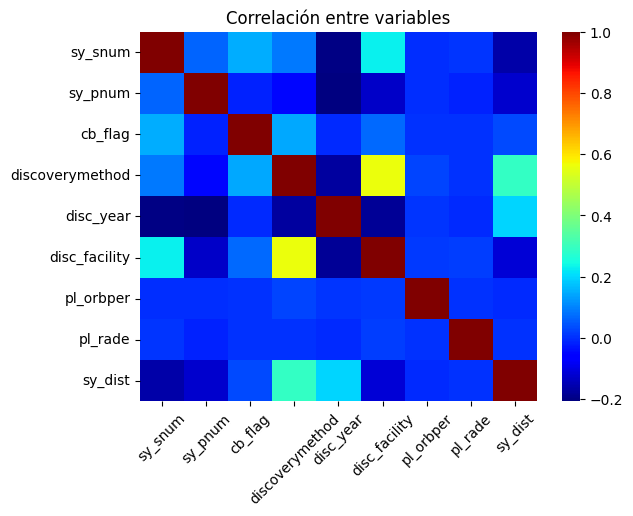

In [104]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, cmap='jet') #Con la librería seaborn podemos crear el tipo de gráfico Heatmap, que muestra las correlaciones entre variables
plt.xticks(rotation=45)
plt.title('Correlación entre variables')

It doesn't look like most

Now let's take a look to what the number of stars in the planetary system looks like.

Text(0.5, 1.0, 'Number of stars each exoplanet has')

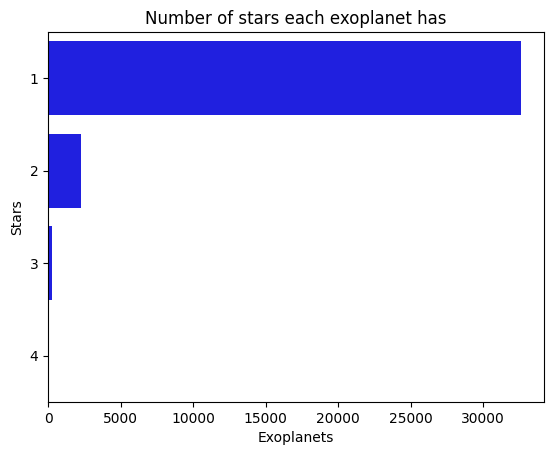

In [105]:
# Bar plot for sy_num
sns.countplot(y='sy_snum', data=df, color='blue')
plt.xlabel('Exoplanets')
plt.ylabel('Stars')
plt.title('Number of stars each exoplanet has')

<ipython-input-106-d70722f7edc9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cb_flag', data=df, palette='pastel')


0    35102
1       79
Name: cb_flag, dtype: int64

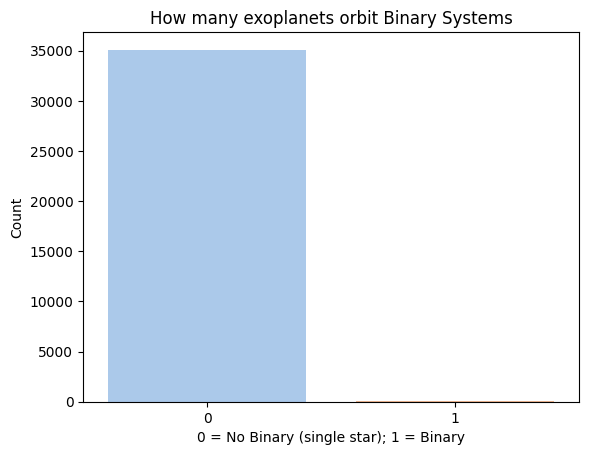

In [106]:
# Count plot for how many exoplanets orbit a binary system
sns.countplot(x='cb_flag', data=df, palette='pastel')
plt.xlabel('0 = No Binary (single star); 1 = Binary')
plt.ylabel('Count')
plt.title('How many exoplanets orbit Binary Systems')
df['cb_flag'].value_counts()

Text(0.5, 1.0, 'title')

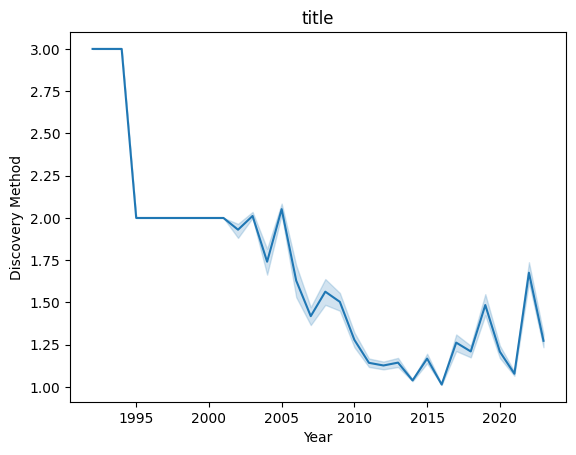

In [107]:
# Relationship between the discovery method and the year of discovery
sns.lineplot(x='disc_year', y='discoverymethod', data=df)
plt.xlabel('Year')
plt.ylabel('Discovery Method')
plt.title('title')

Text(0.5, 1.0, 'Most used discovery method')

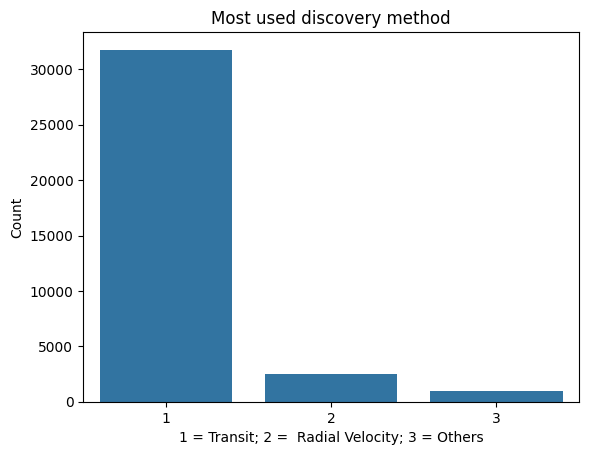

In [108]:
# Most used discovery method (sneak peek from the label encoding)
sns.countplot(x='discoverymethod', data=df)
plt.xlabel('1 = Transit; 2 =  Radial Velocity; 3 = Others')
plt.ylabel('Count')
plt.title('Most used discovery method')

Text(0.5, 1.0, 'Most used discovery method')

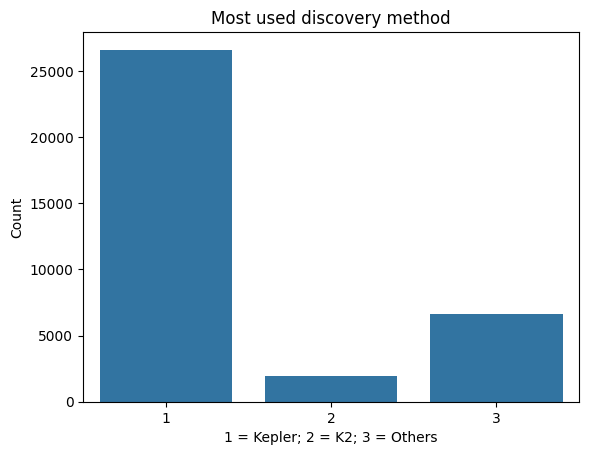

In [109]:
# Facility with most discoveries
sns.countplot(x='disc_facility', data=df)
plt.xlabel('1 = Kepler; 2 = K2; 3 = Others')
plt.ylabel('Count')
plt.title('Most used discovery method')

In [110]:
# Histogram distribution for float variables
#sns.histplot(df['pl_orbper'])
#sns.pairplot(df[['pl_orbper']])

<Axes: xlabel='pl_rade', ylabel='Count'>

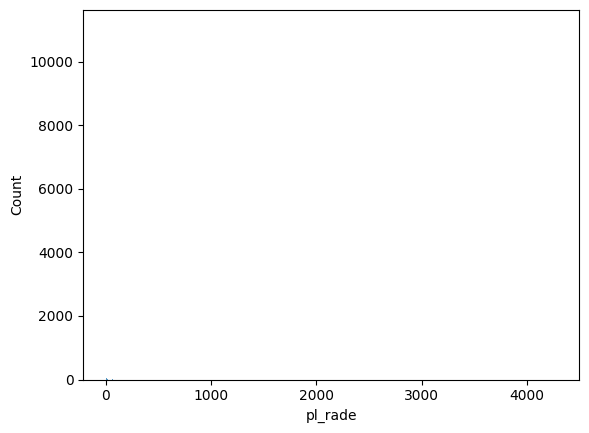

In [111]:
sns.histplot(df['pl_rade'])

<Axes: xlabel='sy_dist', ylabel='Count'>

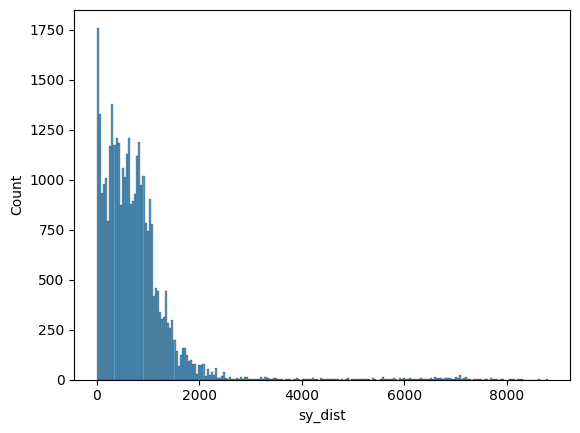

In [112]:
sns.histplot(df['sy_dist'])

<Axes: ylabel='pl_orbper'>

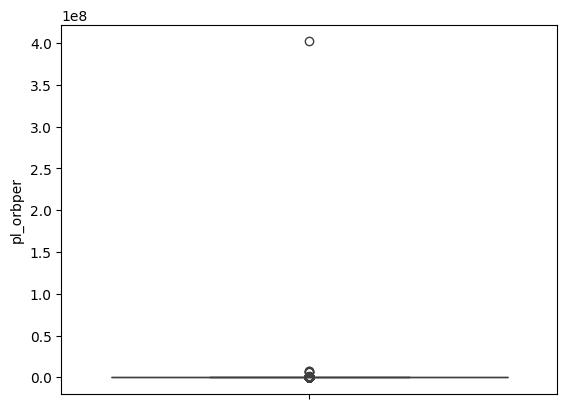

In [113]:
# Boxplot of the float variables
sns.boxplot(df['pl_orbper'])

<Axes: ylabel='pl_rade'>

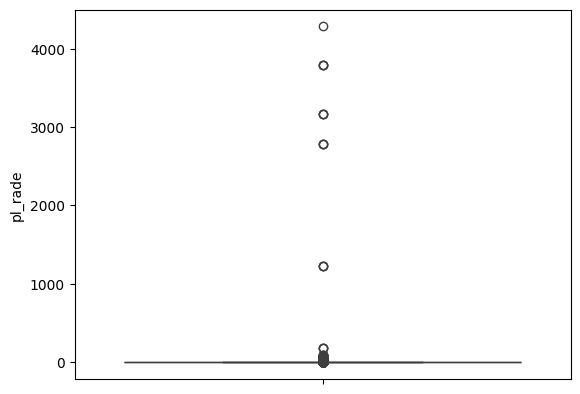

In [114]:
sns.boxplot(df['pl_rade'])

<Axes: ylabel='sy_dist'>

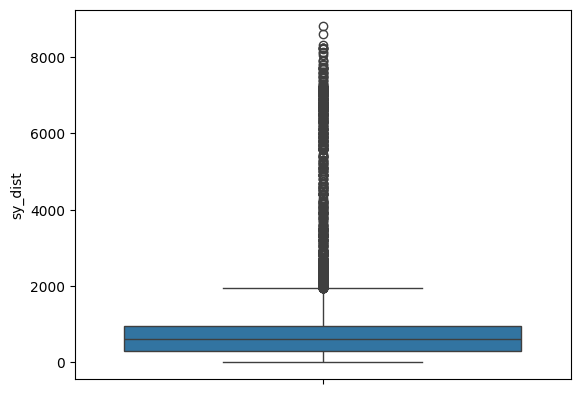

In [115]:
sns.boxplot(df['sy_dist'])

Text(0.5, 1.0, 'Is there a relationship between')

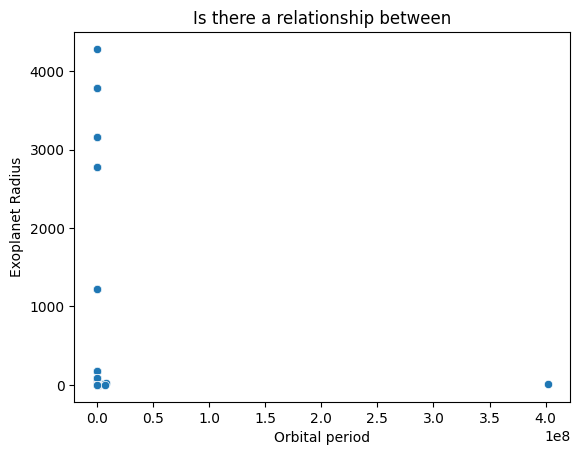

In [116]:
# Scatterplot with pl_orbper and pl_rade
sns.scatterplot(x='pl_orbper', y='pl_rade', data=df)
plt.xlabel('Orbital period')
plt.ylabel('Exoplanet Radius')
plt.title('Is there a relationship between')

Maximum (8800.0) and minimum (1.30119)


<ipython-input-117-facb28c193fe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[maximum.iloc[0,0], minimum.iloc[0,0]], y=[max_distance, min_distance], palette=['red', 'blue'])


Text(0.5, 1.0, 'Farthest and closest exoplanets')

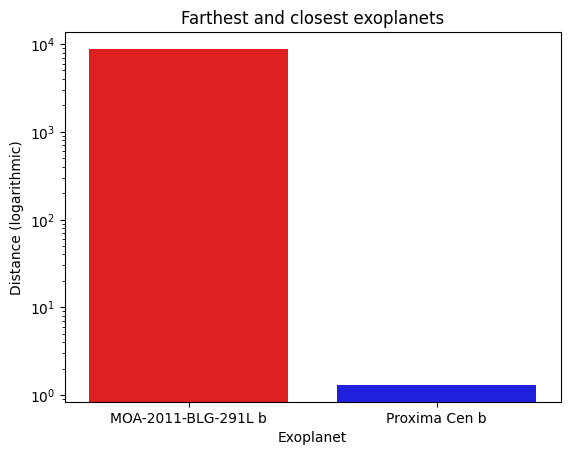

In [117]:
# Maximum and Minimum distances to the exoplanets system
min_distance = min(df['sy_dist'])
min_index = df['sy_dist'].idxmin() #get the index from the smallest value in sy_dist
minimum = df.loc[[min_index],['pl_name']] #apply the filter to get the name. It creates a df with the index and the name

max_distance = max(df['sy_dist'])
max_index = df['sy_dist'].idxmax() #the same can be done to the maximum value
maximum = df.loc[[max_index],['pl_name']] #new small df

print(f'Maximum ({max_distance}) and minimum ({min_distance})')
sns.barplot(x=[maximum.iloc[0,0], minimum.iloc[0,0]], y=[max_distance, min_distance], palette=['red', 'blue'])
plt.yscale('log') # I'm using the logarithmic scaling for better visualization
plt.xlabel('Exoplanet')
plt.ylabel('Distance (logarithmic)')
plt.title('Farthest and closest exoplanets')

Note that, even if the scale is logarithmic, which I made it to see the difference between the maximum and minimum (otherwise it would be unnoticeable), the real distance is measured in parsecs. That is to say that the closest exoplanet is 1.3 parsecs away and the farthest is 8800 parsecs into the deep sky. To put this into persepective, 1 parsec = 1,03E+16 meters. That is 16 zeros!!

Text(0.5, 1.0, 'Years of discovery and distances')

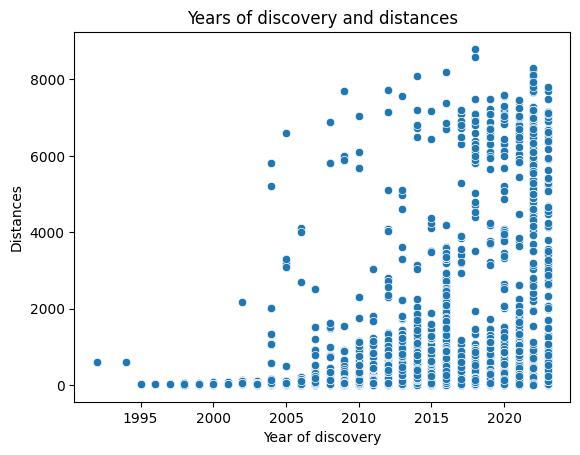

In [118]:
# Distances and the year of discovery
sns.scatterplot(x='disc_year', y='sy_dist', data=df)
plt.xlabel('Year of discovery')
plt.ylabel('Distances')
plt.title('Years of discovery and distances')

Related to this, let's see the number of discoveries per year and see the progression over time.

In [119]:
discoveries_per_year = df.groupby('disc_year').size()
discoveries_per_year

disc_year
1992        6
1994        2
1995        5
1996       41
1997        4
1998       38
1999       77
2000       77
2001       57
2002      144
2003       84
2004      170
2005      153
2006      143
2007      303
2008      321
2009      399
2010      549
2011      979
2012     1037
2013      964
2014     8910
2015      863
2016    12855
2017      518
2018      913
2019      497
2020      809
2021     2611
2022      741
2023      911
dtype: int64

Text(0.5, 1.0, 'Discoveries made over time')

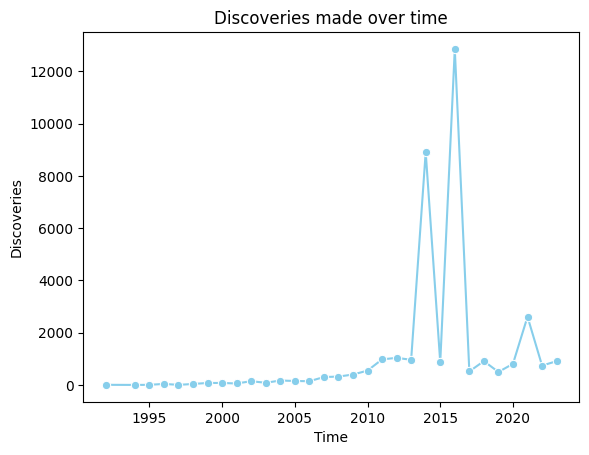

In [120]:
# Lineplot
sns.lineplot(x=discoveries_per_year.index, y= discoveries_per_year.values, marker='o', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Discoveries')
plt.title('Discoveries made over time')

Three years had more than the rest: 2014, 2016 and 2021. buscar por qué??''

There is another interesting relationship worth checking: the discovery method and the distances measured. Since each method has measured different exoplanets, each at a different location, I'm going to calculate how far, on average, each discovery method can detect exoplanets.

In [121]:
# Grouping by discovery method (0, 1 and 3) and then calculating the mean for each one of its categories
mean_distances = df.groupby('discoverymethod')['sy_dist'].mean()

print(mean_distances)

discoverymethod
1     716.094828
2      68.285445
3    3444.505087
Name: sy_dist, dtype: float64


Text(0.5, 1.0, 'Years of discovery and distances')

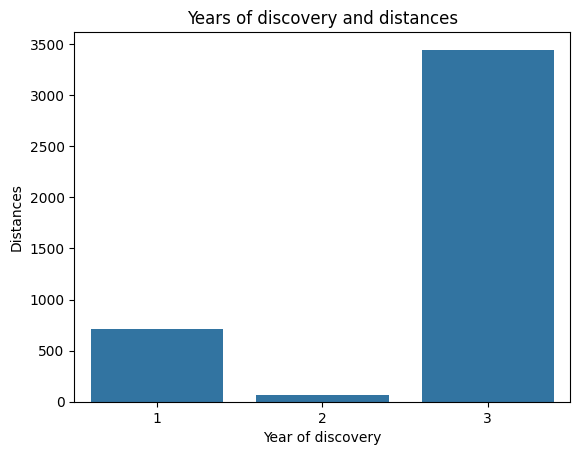

In [122]:
# Distances and the discovery method
sns.barplot(x=mean_distances.index, y=mean_distances.values)
plt.xlabel('Year of discovery')
plt.ylabel('Distances')
plt.title('Years of discovery and distances')

And what about the most used discovery methods each facility use? What's most effective? Since I label encoded both variables and now they only have 3 values (1, 2 and 3), a convenient option may be a heatmap.

Text(0.5, 1.0, 'Frequency of Discovery Method by Facility')

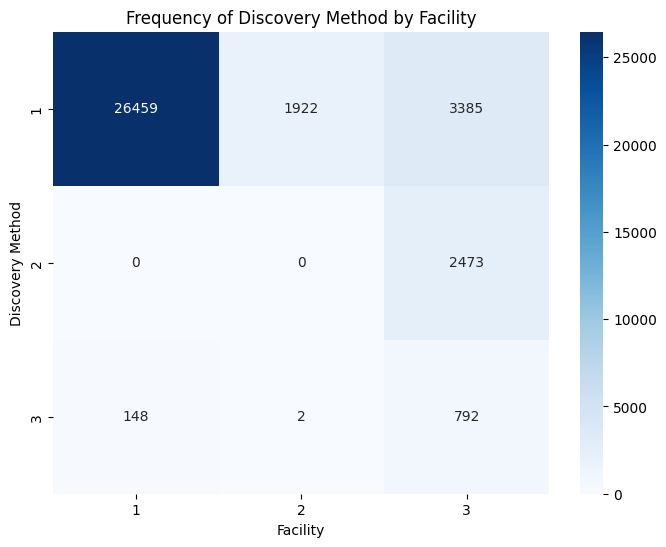

In [83]:
# Discovery facility and discovery method?

contingency_table = pd.crosstab(df['discoverymethod'], df['disc_facility'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

plt.xlabel('Facility')
plt.ylabel('Discovery Method')
plt.title('Frequency of Discovery Method by Facility')

It's obvious to see that

## Insights

frases cortas en bullet points que resuma los descubrimientos


## Conclusion

texto conclusión

Honestly the dataframe is not the best for plotting, in terms of datatypes and amount of rows, but it may reflect a part of a real world job in which the data is not gathered how you would like it to be.

más, el texto de arriba para el final

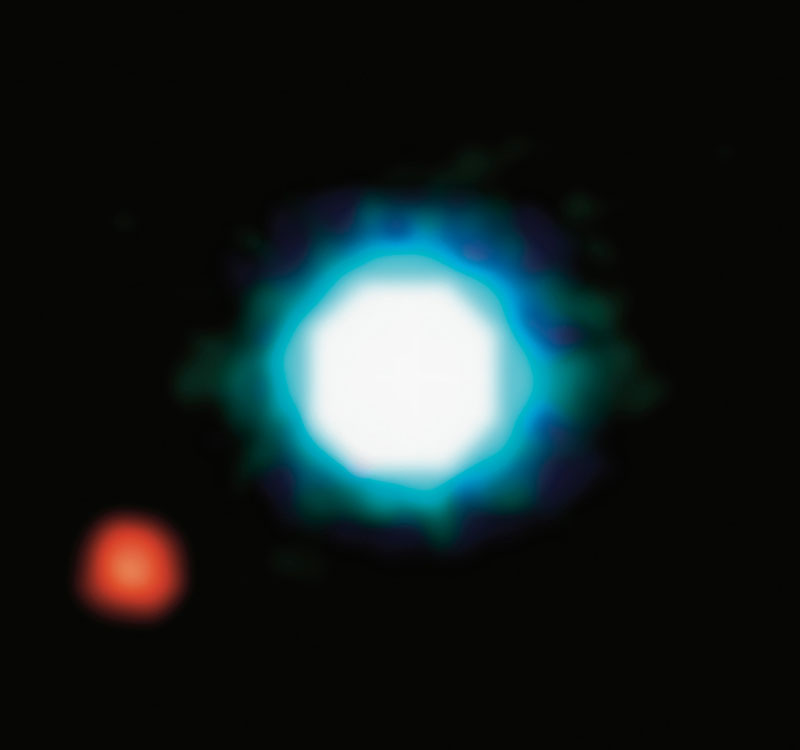

In the image above you can see the exoplanet 2M1207 b (red spot on the lower left) orbiting the brown dwarf star 2M1207 (center). This is one of the first ever taken pictures of an exoplanet!
